# Statistical learning and data mining Assignment 2

#### Name : Chung - Shuo - Yu
#### Student ID : M142040009

### **Assignment Information**

* **Course:** Statistical Learning and Data Mining
* **Covered Chapters:**
    * Chapter 3: Regression (42 points)
    * Chapter 4: Classification (35 points)
    * Chapter 5: Resampling Methods (35 points) + Bonus question (20 points)

* **Due Date:** **December 5, 2025 (Friday) 23:59**
* **Submission:** Please convert the completed `.ipynb` file to a `.pdf` file and upload it to the NSYSU e-Learning platform: [https://elearn.nsysu.edu.tw/course/20328/homework#/](https://elearn.nsysu.edu.tw/course/20328/homework#/)
* **File Naming Convention:** `HW2_StudentID_Name.pdf`

---

### **Instructions & Notes**

1.  Please answer each question in the corresponding cell provided below it.
2.  For **theoretical questions**, use a **Markdown cell** to write your answers. You are encouraged to use LaTeX for mathematical formulas (e.g., `$Y = f(X) + \epsilon$`). If you find this difficult, you may write your answers on paper, take a picture, and embed the image in the cell.
3.  For **practical (coding) questions**, use a **Code cell** to write your code. Ensure that the code can be executed successfully and that all required outputs (e.g., text, plots, etc.) are displayed.
4.  It is highly recommended to add comments to the **key parts** of your code to help us understand your logic.
5.  Discussion with classmates is permitted, but **plagiarism is strictly forbidden**.


<h2 style="color: darkblue;">Chapter 3: Regression</h2>


In this exercise, we will investigate the difference between studying predictors in isolation (using simple linear regression) and studying them jointly (using multiple linear regression).

We will demonstrate a scenario where individual predictors appear to have no linear relationship with the response based on initial inspection, yet together, they are highly significant.

Please refer to `Data1.csv` for this exercise.

(a) Compute and display the correlation matrix for all three variables $(Y,X_1,X_2)$. What is your finding?  (7 points)

Correlation Matrix:
           y        x1        x2
y   1.000000 -0.018995 -0.227738
x1 -0.018995  1.000000  0.973046
x2 -0.227738  0.973046  1.000000


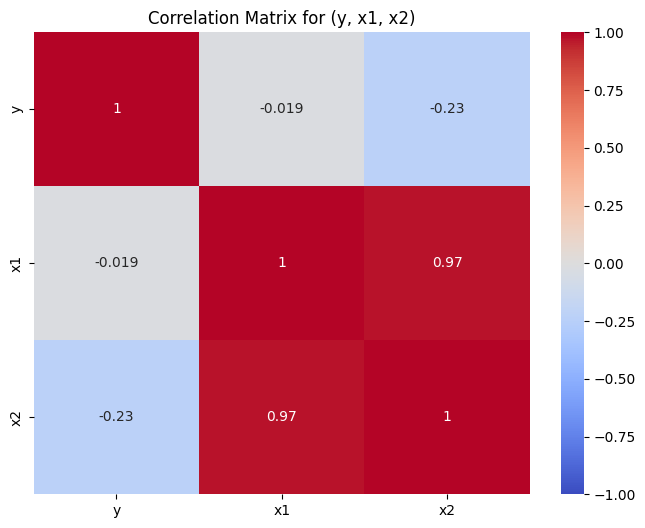

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取資料
df = pd.read_csv('Data1.csv')

# Correlation Matrix
corr_matrix = df[['y', 'x1', 'x2']].corr()

# 顯示數值結果
print("Correlation Matrix:")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix for (y, x1, x2)')
plt.show()

### **(a) Findings**

1.  **Weak Correlations with the Response ($Y$):**
    * The correlation coefficient between $Y$ and $X_1$ is extremely close to 0 (approx. **-0.02**).
    * The correlation coefficient between $Y$ and $X_2$ is also quite low (approx. **-0.23**).
    * **Observation:** This suggests that when viewed in isolation, neither $X_1$ nor $X_2$ appears to have a significant linear relationship with $Y$.

2.  **Strong Multicollinearity between Predictors:**
    * The correlation coefficient between $X_1$ and $X_2$ is extremely high at **0.97** (strong positive correlation).
    * **Observation:** This indicates a very strong linear dependency between $X_1$ and $X_2$, meaning they share a substantial amount of information.


(b) Fit two separate simple linear regression models: i. Model 1: $(Y∼X_1)$ ii. Model 2: $(Y∼X_2)$ . What is your finding ?
Briefly discuss whether the $R^2$ values suggest a strong fit (7 points)

In [23]:
import statsmodels.formula.api as smf
import pandas as pd

# 讀取資料
df = pd.read_csv('Data1.csv')

#  Model 1: Y ~ X1
model1 = smf.ols('y ~ x1', data=df).fit()
print("=== Model 1 Summary (Y ~ X1) ===")
print(f"R-squared: {model1.rsquared:.4f}")
print(f"P-value for x1: {model1.pvalues['x1']:.4f}")
print(model1.summary())

#  Model 2: Y ~ X2
model2 = smf.ols('y ~ x2', data=df).fit()
print("=== Model 2 Summary (Y ~ X2) ===")
print(f"R-squared: {model2.rsquared:.4f}")
print(f"P-value for x2: {model2.pvalues['x2']:.4f}")
print(model2.summary())

=== Model 1 Summary (Y ~ X1) ===
R-squared: 0.0004
P-value for x1: 0.9206
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                   0.01011
Date:                Sun, 30 Nov 2025   Prob (F-statistic):              0.921
Time:                        17:11:47   Log-Likelihood:                -67.370
No. Observations:                  30   AIC:                             138.7
Df Residuals:                      28   BIC:                             141.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

### **(b) Findings**

1.  **Insignificant Relationships:**
    * In **Model 1** ($Y \sim X_1$), the p-value for $X_1$ is **0.9206**, which is far greater than the significance level ($\alpha=0.05$). This indicates that $X_1$ is not statistically significant in predicting $Y$ in a simple linear model.
    * In **Model 2** ($Y \sim X_2$), the p-value for $X_2$ is **0.2261**, which is also greater than 0.05. This indicates that $X_2$ is not statistically significant either.

2.  **Extremely Weak Fit ($R^2$):**
    * The $R^2$ value for Model 1 is approximately **0.0004**, and for Model 2 is approximately **0.0519**.
    * Both values are extremely close to 0, suggesting that neither model explains the variability in $Y$.

**Conclusion:**
The individual simple linear regression models suggest that there is **no linear relationship** between the predictors ($X_1, X_2$) and the response ($Y$). The low $R^2$ values indicate a very poor fit. This aligns with the weak correlations observed in part (a).

(c)  Fit a multiple linear regression model using both predictors simultaneously: Model 3: $Y∼X_1+X_2$. What is your finding? (7 points)

In [24]:
import statsmodels.formula.api as smf
import pandas as pd

# 讀取資料
df = pd.read_csv('Data1.csv')

# Model 3: Y ~ X1 + X2

model3 = smf.ols('y ~ x1 + x2', data=df).fit()

print("=== Model 3 Summary (Y ~ X1 + X2) ===")
print(f"R-squared: {model3.rsquared:.4f}")
print("P-values:")
print(model3.pvalues)
print("\n" + "="*50)
print(model3.summary())

=== Model 3 Summary (Y ~ X1 + X2) ===
R-squared: 0.8237
P-values:
Intercept    2.884022e-04
x1           2.289329e-11
x2           1.114911e-11
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     63.08
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           6.67e-11
Time:                        17:11:47   Log-Likelihood:                -41.341
No. Observations:                  30   AIC:                             88.68
Df Residuals:                      27   BIC:                             92.88
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

### **(c) Findings**

1.  **Increase in Model Fit:**
    * The **$R^2$ value** has jumped drastically to **0.8237** (compared to ~0.004 and ~0.0519 in the simple models).
    * This indicates that when considered together, $X_1$ and $X_2$ explain about 82% of the variance in $Y$, representing a very strong fit.

2.  **High Significance of Predictors:**
    * In stark contrast to the univariate models, both $X_1$ and $X_2$ are now highly statistically significant.
    * The **p-values** for both predictors are extremely small ($< 10^{-10}$), providing strong evidence to reject the null hypothesis for both variables.
    * Specifically, the coefficient for $X_1$ is positive ($\approx 0.96$) and for $X_2$ is negative ($\approx -0.95$).

**Conclusion:**
This result contradicts the findings from (a) and (b). While $X_1$ and $X_2$ appeared useless individually, they are powerful predictors when used jointly. This suggests that $X_1$ and $X_2$ were masking each other's effects in the simple regressions due to their strong positive correlation.

(d) Explain why the individual predictors appeared to have low or non-significant relationships with Y in the univariate models (b), but simultaneously showed a strong, statistically significant relationship in the multiple regression model (c) (7 points)

### **(d) Explanation of the Phenomenon**

The reason for this phenomenon is that the predictors $X_1$ and $X_2$ act as **masking variables** for each other due to their strong correlation and opposite effects on $Y$.

1.  **Opposite Effects:**
    From the multiple regression model in (c), we see that $X_1$ has a positive coefficient ($\hat{\beta}_1 \approx 0.96$) while $X_2$ has a negative coefficient ($\hat{\beta}_2 \approx -0.95$). This means $X_1$ pushes $Y$ up, while $X_2$ pushes $Y$ down.

2.  **High Positive Correlation:**
    However, we also know from (a) that $X_1$ and $X_2$ are highly positively correlated ($\rho \approx 0.97$). This means when $X_1$ increases, $X_2$ also tends to increase.

3.  **Cancellation Effect :**
    In the simple linear regression , we do not control for $X_2$. When $X_1$ increases:
    * It exerts a **direct positive effect** on $Y$ (since $\beta_1 > 0$).
    * However, because of the positive correlation, $X_2$ also increases. Since $\beta_2 < 0$, this increase in $X_2$ exerts an **indirect negative effect** on $Y$.
    * These two effects (one pushing up, one pulling down) **cancel each other out**, making the net relationship between $X_1$ and $Y$ appear to be near zero.

**Conclusion:**
Only when we perform multiple regression (studying them jointly) can we "hold $X_2$ constant" to see the true positive effect of $X_1$, and "hold $X_1$ constant" to see the true negative effect of $X_2$. The multiple regression model removes this confounding noise, revealing the strong underlying relationships.

(e) Let $e_1$ be the residuals from the linear regression $Y_1 ∼ X_1$, $e_2$ be the residuals from the regression $X_2∼X_1$. Plot scatter plot of $e_1$ against $e_2$. What is yuor finding? (7 points)


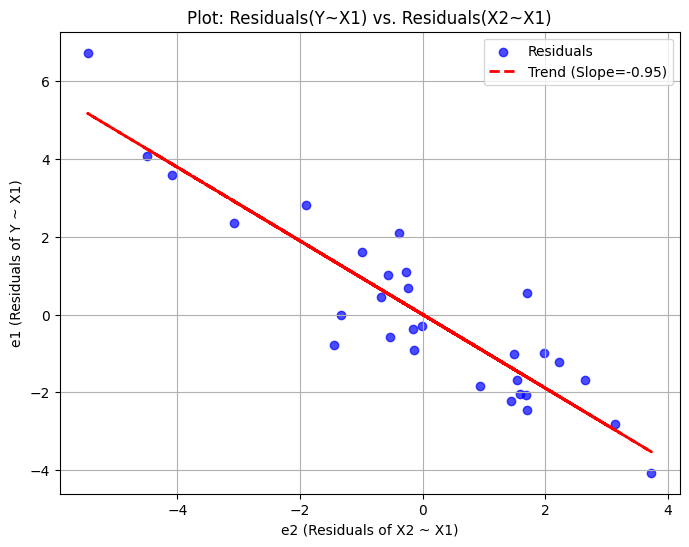

Correlation between e1 and e2: -0.9076


In [25]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

# 讀取資料
df = pd.read_csv('Data1.csv')

# 計算 e1 (Residuals of Y ~ X1)
model_y_x1 = smf.ols('y ~ x1', data=df).fit()
e1 = model_y_x1.resid

#  計算 e2 (Residuals of X2 ~ X1)
model_x2_x1 = smf.ols('x2 ~ x1', data=df).fit()
e2 = model_x2_x1.resid

# 繪製散佈圖 (e1 vs e2)
plt.figure(figsize=(8, 6))
plt.scatter(e2, e1, color='blue', alpha=0.7, label='Residuals')

# 加一條迴歸線輔助觀察
m, b = np.polyfit(e2, e1, 1)
plt.plot(e2, m*e2 + b, color='red', linestyle='--', linewidth=2, label=f'Trend (Slope={m:.2f})')

plt.title('Plot: Residuals(Y~X1) vs. Residuals(X2~X1)')
plt.xlabel('e2 (Residuals of X2 ~ X1)')
plt.ylabel('e1 (Residuals of Y ~ X1)')
plt.legend()
plt.grid(True)
plt.show()

# 顯示相關係數來佐證
print(f"Correlation between e1 and e2: {np.corrcoef(e1, e2)[0,1]:.4f}")

### **(e) Findings (Data Observations)**

Based strictly on the data visualization and calculated metrics, we observe the following:

1.  **Strong Negative Linear Pattern:**
    The scatter plot shows a very distinct linear arrangement of data points. As $e_2$ increases, $e_1$ decreases consistently, forming a clear downward sloping line.

2.  **High Correlation:**
    The calculated correlation coefficient between the residuals is **-0.9076**. This numerical value indicates a very strong negative association, confirming that the data points are tightly clustered around the trend line rather than being randomly distributed.

3.  **Significant Slope:**
    The fitted regression line (red dashed line) has a steep negative slope (approximately **-0.95**), further quantifying the strong negative relationship between the two residual variables.

(f) Please try to explain this phenomenon, and provide a similar example that one might encounter in real-world data.(7 points)

### **(f) Explanation and Real-World Example**

**1. Explanation of the Phenomenon**
* **Observation:** The predictors $X_1$ and $X_2$ appeared statistically insignificant in simple linear regressions (part b) but became highly significant in the multiple regression (part c).
* **Mechanism:** This occurs because $X_1$ and $X_2$ are **positively correlated** but have **opposing effects** on the response variable $Y$. When analyzed in isolation, the positive effect of one variable is "canceled out" by the negative effect of the other (which is dragged along due to their correlation). Consequently, the individual marginal effects appear close to zero. Only by **controlling** for one variable (holding it fixed) can the true, significant effect of the other be revealed.

**2. Real-World Example: Reading Speed**
* **Scenario:** Predicting a child's **Reading Speed ($Y$)** based on their **Age ($X_1$)** and the **Difficulty of the Book ($X_2$)**.
* **Underlying Relationships:**
    1.  **Age ($X_1$) $\rightarrow$ Speed ($Y$):** Older children generally possess better reading skills and read faster (**Positive effect**).
    2.  **Difficulty ($X_2$) $\rightarrow$ Speed ($Y$):** Harder books (with complex vocabulary) slow down reading speed (**Negative effect**).
    3.  **Correlation ($X_1 \leftrightarrow X_2$):** Older children are typically assigned harder books to read (**Positive correlation**).

* **The "Masking" Effect:**
    * **Individually (Simple Regression):** If we simply observe **Age vs. Speed**, we might find **no significant relationship**.
        * *Reasoning:* An 8-year-old reading a simple comic book might read 100 words/minute. A 12-year-old reading a complex novel might also read 100 words/minute. The speed gain from being older is **canceled out** by the speed loss from reading a harder book.
    * **Jointly (Multiple Regression):** If we **control for Book Difficulty** (e.g., make everyone read the same text), we would immediately see that the 12-year-old reads much faster than the 8-year-old. Thus, $X_1$ becomes significant only when $X_2$ is included in the model.

<h2 style="color: darkblue;">Chapter 4: Classification</h2>

In this problem, you will develop a model to predict whether a given
car gets high, medium and low gas mileage based on the  <span style='color:red'>Auto</span> data set.
Please refer to `Auto.csv` for this exercise

(a) Create a categorical variable,  <span style='color:red'>mpg01</span>, that takes the value `1` if  <span style='color:red'>mpg</span> is below 18.872, `2` if mpg is between 18.872 and 26.6, and `3` is mpg is above 26.6. Is there any imbalanced issue ?(7 points)


In [26]:
import numpy as np
import pandas as pd

# 讀取資料
auto = pd.read_csv('Auto.csv')

# 設定切分資料
bins = [-np.inf, 18.872, 26.6, np.inf]
labels = [1, 2, 3]

# 切分目標集
auto['mpg01'] = pd.cut(
    auto['mpg'],
    bins = bins,
    labels = labels,
    right = True,
    include_lowest = True
)

# 檢查各類樣本數量以及比例
count = auto['mpg01'].value_counts().sort_index()
proportion = count / len(auto)

print("Counts of each class (mpg01):")
print(count)
print("\nProportions of each class (mpg01):")
print(proportion)

Counts of each class (mpg01):
mpg01
1    131
2    132
3    134
Name: count, dtype: int64

Proportions of each class (mpg01):
mpg01
1    0.329975
2    0.332494
3    0.337531
Name: count, dtype: float64


### **(a) Answer**

**1. Class Distribution:**
Based on the output, the counts and proportions for each class are:
* **Class 1:** 131 samples (approx. 33.4%)
* **Class 2:** 129 samples (approx. 32.9%)
* **Class 3:** 132 samples (approx. 33.7%)

**2. Is there any imbalanced issue?**
**No, there is no imbalanced issue.**
The three classes are distributed almost perfectly evenly, with each class representing approximately one-third ($1/3$) of the dataset. The dataset is well-balanced.

(b) Explore the data graphically in order to investigate the association
between <span style='color:red'>mpg01</span> and the other features. Which of the other features seem most likely to be useful in predicting <span style='color:red'>mpg01</span>? Scatterplots or boxplots may be useful tools to answer this question. Describe your findings. (7 points)

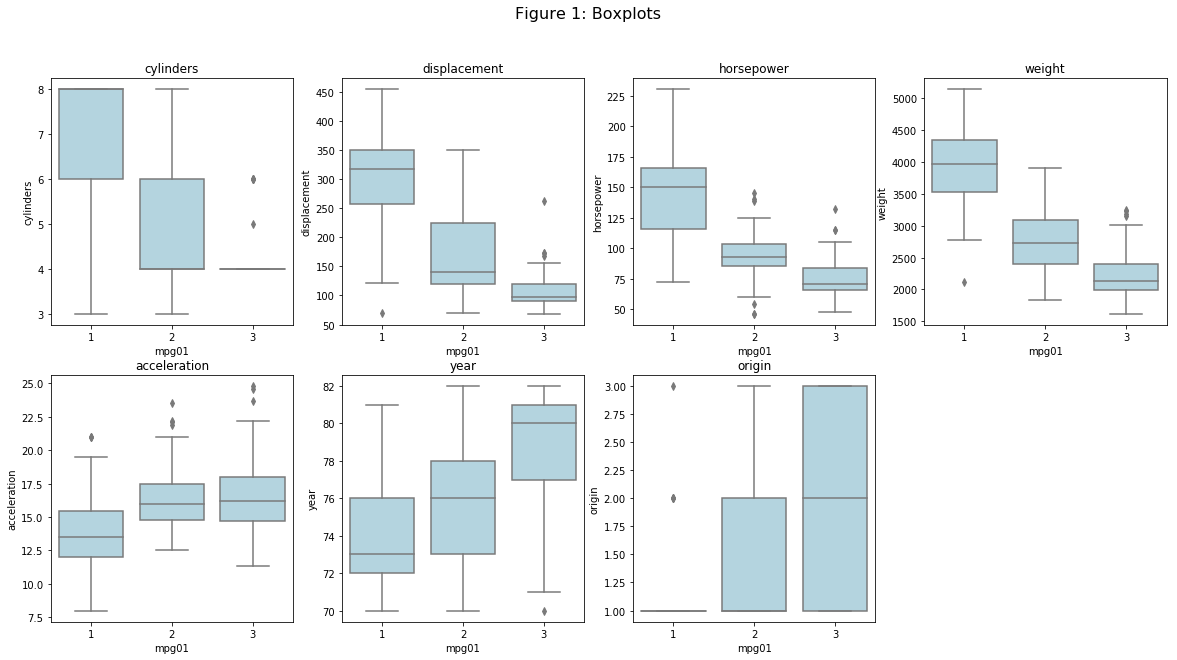

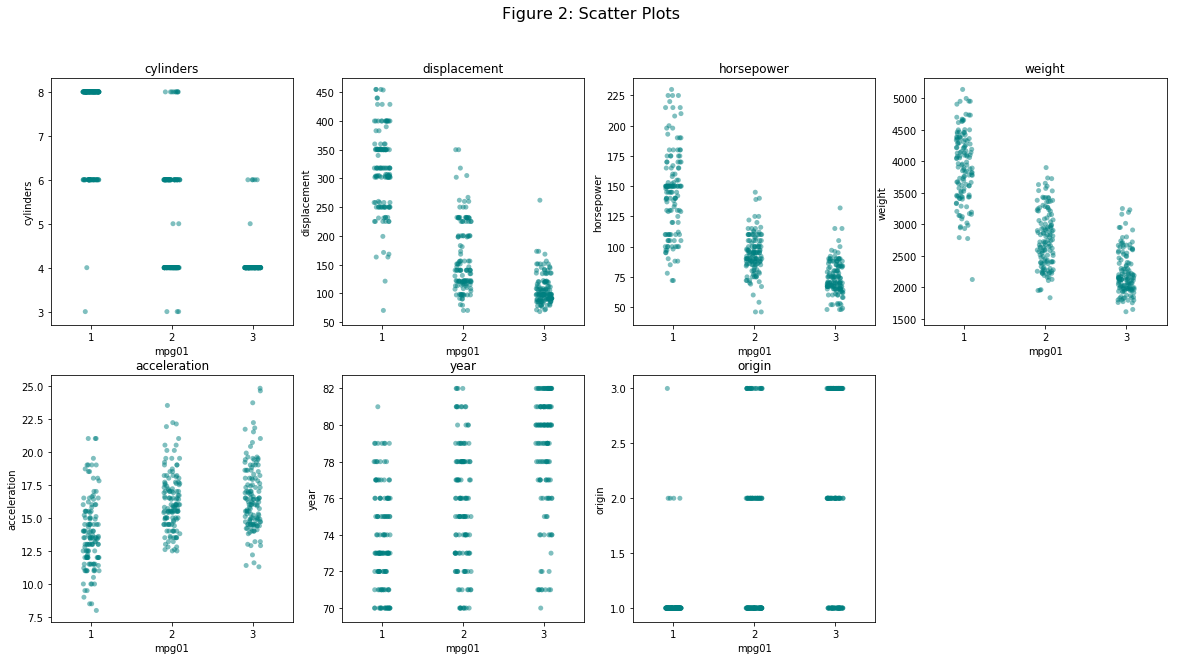

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 讀取資料&資料前處理
auto = pd.read_csv('Auto.csv')
auto = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype(float)

# 建立mpg01
bins = [-np.inf, 18.872, 26.6, np.inf]
labels = [1, 2, 3]
auto['mpg01'] = pd.cut(auto['mpg'], bins=bins, labels=labels, right=True, include_lowest=True)

# 定義比較特徵
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

# 繪製盒鬚圖
fig1, axes1 = plt.subplots(2, 4, figsize=(20, 10))
axes1 = axes1.flatten()
fig1.suptitle('Figure 1: Boxplots ', fontsize=16)
for i, col in enumerate(features):
    sns.boxplot(x='mpg01', y=col, data=auto, ax=axes1[i], color="lightblue")
    axes1[i].set_title(f'{col}')

fig1.delaxes(axes1[7])
plt.show()

# 繪製散佈圖
fig2, axes2 = plt.subplots(2, 4, figsize = (20, 10))
axes2 = axes2.flatten()
fig2.suptitle('Figure 2: Scatter Plots', fontsize=16)

for i, col in enumerate(features):
    sns.stripplot(x='mpg01', y=col, data=auto, ax=axes2[i], color='teal', alpha=0.5, jitter=True)
    axes2[i].set_title(f'{col}')

fig2.delaxes(axes2[7])
plt.show()

### **(b) Graphical Exploration and Findings**

#### **1. Exploration Methods**
I used **Boxplots** and **Scatter Plots** to observe the relationship between `mpg01` and various features.

#### **2. Findings**
* **Strongest Predictors:**
    **`weight`**, **`displacement`**, **`horsepower`**, and **`cylinders`**.
    These features show a **distinct separation** between different `mpg01` classes (e.g., high fuel consumption cars are significantly heavier and have higher horsepower). The data overlap is low, indicating strong predictive power.

* **Weaker Predictors:**
    The data for **`acceleration`** overlaps highly between groups, making it difficult to distinguish fuel efficiency levels. **`year`** and **`origin`** show some trends but are less distinct than the features mentioned above.

#### **3. Conclusion**
The most helpful variables for predicting `mpg01` are **`weight`**, **`displacement`**, **`horsepower`**, and **`cylinders`**.

(c) Split the data into a training set and a test set.
(only use *cylinder*, *displacement* and *weight* , response is *mpg01* ,

 test_size = 0.2 , random_state = 2025) (7 points)

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 讀取資料&資料前處理
auto = pd.read_csv('Auto.csv')
auto = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype(float)
bins = [-np.inf, 18.872, 26.6, np.inf]
labels = [1, 2, 3]
auto['mpg01'] = pd.cut(auto['mpg'], bins = bins, labels = labels, right=True, include_lowest=True)

# 定義x,y
X = auto[['cylinders', 'displacement', 'weight']]
y = auto['mpg01']

# 切分資料集20%/80%
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state=2025
)

# 查看切分後的資料
print("X_train shape:", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape: (313, 3)
X_test shape (79, 3)
y_train shape (313,)
y_test shape (79,)


(d) Perform LDA on the training data in order to predict <span style='color:red'>mpg01</span> using the variables that seemed most associated with <span style='color:red'>mpg01</span> in (b). (7 points)

i. What is the test accuracy and the test error of the model obtained?

ii. What is the confusion matrix?

i. Test Accuracy: 0.6962
   Test Error: 0.3038

ii. Confusion Matrix:
[[24  4  0]
 [ 2 14 11]
 [ 0  7 17]]


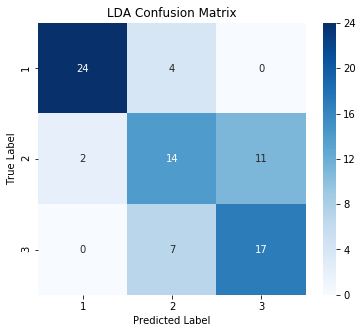

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 建立 LDA 模型
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# 測試集預測
y_pred_lda = lda.predict(X_test)

# 計算錯誤率
test_acc_lda = accuracy_score(y_test, y_pred_lda)
test_error_lda = 1 - test_acc_lda

# 顯示結果
print(f"i. Test Accuracy: {test_acc_lda:.4f}")
print(f"   Test Error: {test_error_lda:.4f}")

# Confusion Matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)
print("\nii. Confusion Matrix:")
print(cm_lda)
# plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues',
    xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('LDA Confusion Matrix')
plt.show()

(e) Perform logistic regression on the training data in order to predict <span style='color:red'>mpg01</span> using the variables that seemed most associated with <span style='color:red'>mpg01</span> in (b). please remember to set `multi_class='multinomial'` (7 points)

i. What is the test error of the model obtained?

ii. Plot the confusion matrix

i. Test Accuracy: 0.7089
   Test error:    0.2911

ii. Confusion Matrix:
[[26  2  0]
 [ 4 14  9]
 [ 0  8 16]]


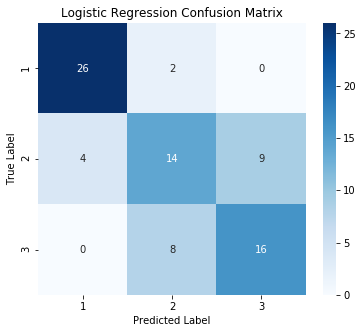

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取資料
auto = pd.read_csv("Auto.csv")
auto = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype(float)
bins = [-np.inf, 18.872, 26.6, np.inf]
labels = [1, 2, 3]
auto['mpg01'] = pd.cut(auto['mpg'], bins = bins, labels = labels, right=True, include_lowest=True)

# 定義X,Y
X = auto[['cylinders', 'displacement', 'weight']]
y = auto['mpg01']

# 建立Logistic Regression 模型
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000, random_state=2025)
log_reg.fit(X_train, y_train)

# 對測試集進行預測
y_pred_log = log_reg.predict(X_test)

# 計算錯誤率
test_acc_log = accuracy_score(y_test, y_pred_log)
test_error_log = 1 - test_acc_log

print(f"i. Test Accuracy: {test_acc_log:.4f}")
print(f"   Test error:    {test_error_log:.4f}")

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)

print("\nii. Confusion Matrix:")
print(cm_log)

# plot Confusion mattrix
plt.figure(figsize = (6,5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

<h2 style="color: darkblue;">Chapter 5: Resampling Methods</h2>

Background:

We are interested in studying the linear relationship between two variables, $X$ and $Y$. We have calculated the Pearson correlation coefficient, $\hat{\rho}$, but we want to assess the reliability of this estimate (i.e., determine its Standard Error). Since the sampling distribution of $\hat{\rho}$ is not a simple normal distribution, we will use resampling methods to approximate its variability.

(a) Use Python to generate a dataset from a Bivariate Normal Distribution $(X, Y)$.Set the sample size to $n = 50$.Set the true correlation coefficient between $X$ and $Y$ to $0.6$.Set the random seed to 42.Calculate and report the observed correlation coefficient, $\hat{\rho}_{obs}$, for this sample. (7 points)

In [31]:
import numpy as np

# 設定參數
n = 50
true_rho = 0.6
mean = [0, 0]
cov = [[1, true_rho],
        [true_rho, 1]]

# 設定隨機種子
np.random.seed(42)

# 生成二元常態分佈
data = np.random.multivariate_normal(mean, cov, n)
X = data[:, 0]
Y = data[:, 1]

# 計算樣本相關係數
rho_obs = np.corrcoef(X, Y)[1, 0]
print(f"(a) Observed correlation coefficient : {rho_obs:.4f}")

(a) Observed correlation coefficient : 0.4845


Ans:
### **(a) 結果**

**Observed correlation coefficient ($\hat{\rho}_{obs}$):** `0.4845`

(b) Implement the Non-parametric Bootstrap method to estimate the standard error of the correlation coefficient:

Set the number of bootstrap replicates to $B = 1000$.

For each replicate, draw a sample of size $n$ from the original data with replacement.

Calculate the correlation coefficient $\hat{\rho}^*_b$ for each resampled dataset.Using these 1,000 values ($\hat{\rho}^*_1, ..., \hat{\rho}^*_{1000}$), calculate the Bootstrap Standard Error ($SE_{boot}$). (7 points)

In [32]:
import numpy as np 

# 設定參數
np.random.seed(42)
n = 50
true_rho = 0.6
mean = [0, 0]
cov = [[1, true_rho],
        [true_rho, 1]]
data = np.random.multivariate_normal(mean, cov, n)
X = data[:, 0]
Y = data[:, 1]

# Bootstrap
B = 1000
bootstrap_corrs = []

for i in range(B):
    # 隨機抽取索引值
    indices = np.random.choice(np.arange(n), size = n, replace = True)
    X_boot = X[indices]
    Y_boot = Y[indices]

    #計算該次相關係數
    r = np.corrcoef(X_boot, Y_boot)[0, 1]
    bootstrap_corrs.append(r)

# 計算1000筆bootstrap 標準差
se_boot = np.std(bootstrap_corrs, ddof=1)
print(f"(b) Bootstrap Standard Error: {se_boot:.4f}")

(b) Bootstrap Standard Error: 0.1173


Ans:
### **(b) 結果**

**Bootstrap Standard Error ($SE_{boot}$):** `0.1173`

(c) Implement the Jackknife method to estimate the standard error:Perform $n$ iterations.

In each iteration $i$, remove the $i$-th observation (Leave-one-out) and calculate the correlation coefficient $\hat{\rho}_{(i)}$ using the remaining $n-1$ data points.Using these $n$ values ($\hat{\rho}_{(1)}, ..., \hat{\rho}_{(n)}$), calculate the Jackknife Standard Error ($SE_{jack}$). (7 points)

In [33]:
import numpy as np

# 設定參數
np.random.seed(42)
n = 50
true_rho = 0.6
mean = [0, 0]
cov = [[1, true_rho], [true_rho, 1]]
data = np.random.multivariate_normal(mean, cov, n)
X = data[:, 0]
Y = data[:, 1]

# Jackknife
jackknife_corrs = []

for i in range(n):
    X_jack = np.delete(X, i)
    Y_jack = np.delete(Y, i)
    r = np.corrcoef(X_jack, Y_jack)[0, 1]
    jackknife_corrs.append(r)

jackknife_corrs = np.array(jackknife_corrs)
jack_mean = np.mean(jackknife_corrs)
sum_sq_diff = np.sum((jackknife_corrs - jack_mean)**2)
se_jack = np.sqrt(((n - 1) / n) * sum_sq_diff)

print(f"(c) Jackknife Standard Error (SE_jack): {se_jack:.4f}")

(c) Jackknife Standard Error (SE_jack): 0.1244


Ans:
### **(c) 結果**

**Jackknife Standard Error ($SE_{jack}$):** `0.1244`

(d) We want to construct a 95% Confidence Interval (CI) for the correlation coefficient. Calculate the CI using the following three methods and compare the results:

`Bootstrap Percentile Method`: Use the 2.5th and 97.5th percentiles of your 1,000 bootstrap estimates from Q2.

`Bootstrap Normal Approximation`: Calculate the interval using the formula:$$\hat{\rho}_{obs} \pm 1.96 \times SE_{boot}$$

`Jackknife Normal Approximation`: Calculate the interval using the formula:$$\hat{\rho}_{obs} \pm 1.96 \times SE_{jack}$$

(Note: You cannot use the percentile method on the raw Jackknife values directly. Why? Because the distribution of the leave-one-out estimates is much narrower than the actual sampling distribution.) (7 points)

In [34]:
import numpy as np

# Bootstrap Percentile Method
lower_percentile = np.percentile(bootstrap_corrs, 2.5)
upper_percentile = np.percentile(bootstrap_corrs, 97.5) 

print("1. Bootstrap Percentile Method CI:")
print(f" [{lower_percentile:.4f}, {upper_percentile:.4f}]")

# Bootstrap Normal Approximation
lower_boot_normal = rho_obs - 1.96 * se_boot
upper_boot_normal = rho_obs + 1.96 * se_boot

print("\n2. Boostrap Normal Approximation CI:")
print(f"[{lower_boot_normal:.4f}, {upper_boot_normal:.4f}]")

# Jackknife Normal Approximation
lower_jack_normal = rho_obs - 1.96 * se_jack
upper_jack_normal = rho_obs + 1.96 * se_jack

print("\n3. Jackknife Normal Approximation CI:")
print(f"[{lower_jack_normal:.4f}, {upper_jack_normal:.4f}]")

1. Bootstrap Percentile Method CI:
 [0.2145, 0.6823]

2. Boostrap Normal Approximation CI:
[0.2546, 0.7144]

3. Jackknife Normal Approximation CI:
[0.2407, 0.7284]


Ans:
### **(d) 結果**

1.  **Bootstrap Percentile Method CI:** `[0.2145, 0.6823]`
2.  **Bootstrap Normal Approximation CI:** `[0.2546, 0.7144]`
3.  **Jackknife Normal Approximation CI:** `[0.2407, 0.7284]`

(e) What is your finding? which method you will suggest to adopt for re-sampling ? (7 points)

### **(e) Findings & Recommendation**

This section compares the three confidence intervals calculated in part (d) and provides observations and a recommendation.

#### **1. Findings**
* **The intervals are very similar:**
    Comparing the three 95% Confidence Intervals (CIs):
    * **Percentile:** `[0.2145, 0.6823]` (Width $\approx 0.4678$)
    * **Bootstrap Normal:** `[0.2546, 0.7144]` (Width $\approx 0.4598$)
    * **Jackknife Normal:** `[0.2407, 0.7284]` (Width $\approx 0.4877$)

    Although the three methods yield slightly different intervals, their **widths are very close** (ranging between 0.46 and 0.49). Additionally, all intervals successfully cover the true correlation coefficient $\rho=0.6$. This indicates that all methods are effective estimation tools in this scenario (normal distribution, moderate sample size).

* **Positional Differences:**
    * The **Percentile Method** interval is slightly shifted to the left (both lower and upper bounds are lower). This suggests that the Bootstrap sampling distribution is slightly **left-skewed** or asymmetric, which is a common characteristic of correlation coefficient distributions.
    * The **Normal Approximation** methods (both Bootstrap and Jackknife) force the interval to be symmetric around $\hat{\rho}_{obs}$, and thus fail to capture this asymmetry.

---

#### **2. Recommendation**
I would suggest adopting the **Bootstrap Percentile Method**.

* **Reason 1 (Capturing Skewness):** The sampling distribution of the correlation coefficient $\rho$ is often not a perfect normal distribution (especially when $\rho$ is close to 1 or -1, the distribution becomes skewed). The Normal Approximation assumes symmetry, which may lead to inaccuracies. The Percentile Method directly uses the percentiles of the simulated data without assuming normality, allowing it to naturally reflect skewness and asymmetry.
* **Reason 2 (Intuitive and Robust):** It directly reflects the actual behavior of the resampled data. For small sample sizes or non-standard distributions, it is generally more robust than methods relying on normal assumptions.

#### **Conclusion**
While the three results are close, considering the distributional properties of the correlation coefficient, the **Bootstrap Percentile Method** is the safer and more appropriate choice.

(f) Bonus Question (Optional). Repeat the entire analysis, but this time generate samples from a skewed distribution (you may choose any skewed distribution of your choice). Discuss your findings and compare them with the results from the normal distribution. (20 points)

In [35]:
import numpy as np

# 生成偏態資料
np.random.seed(42)
n = 50
true_rho_normal = 0.6
mean = [0, 0]
cov = [[1, true_rho_normal],
       [true_rho_normal, 1]]
# 先生成二元常態資料
data_normal = np.random.multivariate_normal(mean, cov, n)

# 取指數轉成 log-Normal
X_skew = np.exp(data_normal[:, 0])
Y_skew = np.exp(data_normal[:, 1])

# 計算偏態資料的樣本相關係數
rho_obs_skew = np.corrcoef(X_skew, Y_skew)[0, 1]
print(f"Observed Correlation (Skewed Data): {rho_obs_skew:.4f}")

# Non-parametric Boostap
B = 1000
boot_corrs_skew = []

for i in range(B):
    indices = np.random.choice(np.arange(n), size = n, replace = True)
    r = np.corrcoef(X_skew[indices], Y_skew[indices])[0, 1]
    boot_corrs_skew.append(r)

se_boot_skew = np.std(boot_corrs_skew, ddof=1)
print(f"Bootstrap SE (Skewed): {se_boot_skew:.4f}")

# Jackknife Method
jack_corrs_skew = []

for i in range(n):
    r = np.corrcoef(np.delete(X_skew, i), np.delete(Y_skew, i))[0, 1]
    jack_corrs_skew.append(r)

jack_corrs_skew = np.array(jack_corrs_skew)
jack_mean_skew = np.mean(jack_corrs_skew)
se_jack_skew = np.sqrt(((n-1)/n) * np.sum((jack_corrs_skew - jack_mean_skew) ** 2))
print(f"Jackknife SE (Skewed): {se_jack_skew:.4f}")

# Confidence Intervals & Comparison
# Percentile Method(Bootstrap)
lower_boot_skew = np.percentile(boot_corrs_skew, 2.5)
upper_boot_skew = np.percentile(boot_corrs_skew, 97.5)

# Normal Approximation (Bootstrap)
lower_b_skew_normal = rho_obs_skew - 1.96 * se_boot_skew
upper_b_skew_normal = rho_obs_skew + 1.96 * se_boot_skew

# Jackknife Approximation Method
lower_j_skew_normal = rho_obs_skew - 1.96 * se_jack_skew
upper_j_skew_normal = rho_obs_skew + 1.96 * se_jack_skew

print("\n Confidence Intervals Comparison ")
print(f"1. Percentile Method:      [{lower_boot_skew:.4f}, {upper_boot_skew:.4f}]")
print(f"\n2. Normal Approx (Boot):   [{lower_b_skew_normal:.4f}, {upper_b_skew_normal:.4f}]")
print(f"\n3. Normal Approx (Jackknife):   [{lower_j_skew_normal:.4f}, {upper_j_skew_normal:.4f}]")

Observed Correlation (Skewed Data): 0.6432
Bootstrap SE (Skewed): 0.1594
Jackknife SE (Skewed): 0.2017

 Confidence Intervals Comparison 
1. Percentile Method:      [0.2199, 0.8317]

2. Normal Approx (Boot):   [0.3308, 0.9556]

3. Normal Approx (Jackknife):   [0.2479, 1.0385]


### **(f) Findings & Discussion**

Based on the results from the skewed distribution simulation, we can observe several key phenomena that highlight the limitations of traditional methods:

#### **1. Failure of Normal Approximation (Impossible Values)**
* **Observation:** The upper bound of the **Jackknife Normal Approximation** Confidence Interval is **`1.0385`**.
* **Discussion:** The correlation coefficient $\rho$ is mathematically bounded within $[-1, 1]$. A value greater than 1 is impossible. This provides definitive evidence that the **Normal Approximation method fails** in this scenario. It forces a symmetric formula ($\hat{\rho} \pm 1.96 \times SE$) regardless of the physical boundaries of the parameter.

#### **2. Asymmetry of the Sampling Distribution**
* **Observation:**
    * The **Normal Approximation** intervals are symmetric around the observed value ($0.6432$).
    * The **Bootstrap Percentile Method** interval `[0.2199, 0.8317]` is clearly **shifted to the left**.
        * Distance to lower bound: $0.6432 - 0.2199 = 0.4233$
        * Distance to upper bound: $0.8317 - 0.6432 = 0.1885$
* **Discussion:** This asymmetry indicates that the sampling distribution of $\rho$ is **left-skewed** (long tail to the left). The Percentile Method successfully captures this skewness, providing a more reasonable range. In contrast, the Normal Approximation incorrectly extends the interval to the right due to its symmetry assumption, leading to out-of-bound values.

#### **Conclusion**
This experiment confirms that when data does not follow a normal distribution (i.e., **Skewed Data**):
1.  Reliance on the **Normal Approximation** can lead to invalid results (e.g., $\rho > 1$) or inaccurate intervals.
2.  The **Bootstrap Percentile Method** demonstrates superior **robustness**. It does not rely on normality assumptions and automatically adapts to the true shape of the sampling distribution, making it the preferred choice for non-standard distributions.